In [119]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
# read in data set with first column (district name) set to index
df = pd.read_excel("complete_data.xlsx", index_col =0)
df_regional = pd.read_excel("Data/Missing Regional Schools.xlsx")


In [121]:
df.head()

,District Code,High Needs#,High Needs%,English Learners#,English Learners%,First Language Not English#,First Language Not English%,Low Income#,Low Income%,Students with Disabilities#.1,Students with Disabilities%.1,Overall Classification,Reason for Classification,Progress Toward Improvement Targets (%),In-District Expenditures,Total In-district FTEs,In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Total Expenditures per Pupil,# in Cohort,% Graduated,% Still in School,% Non-Grad Completers,% H.S. Equiv.,% Dropped Out,% Permanently Excluded,Total # of Teachers (FTE),% of Teachers Licensed,Student / Teacher Ratio,Percent of Experienced Teachers,Percent of Teachers without Waiver or Provisional License,Percent Teaching In-Field,CleanedName,MEMBERS,Population,DOR Income Per Capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),4450000,"1,005",70.7,256,18.0,967,68.0,837,58.9,166,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,"$24,231,438.78","1,415.8","$17,114.65","$24,231,438.78","1,415.8","$17,114.65",88,100.0,0.0,0.0,0.0,0.0,0.0,119.6,99.2,11.9 to 1,81.5,88.3,90.5,abby kelley foster charter public,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",317231.0,40029.375
Abington,10000,"1,029",47.3,236,11.0,362,16.9,736,34.4,387,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,"$35,603,421.16","2,143.5","$16,609.95","$41,098,932.87","2,297.3","$17,890.10",153,88.9,1.3,0.7,0.0,9.2,0.0,153.8,97.1,13.9 to 1,81.3,89.6,95.7,NaN,Abington,17062.0,37848.000
Academy Of the Pacific Rim Charter Public (District),4120000,332,71.1,44,9.4,158,33.8,273,58.5,115,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,"$12,801,946.92",467.4,"$27,392.63","$12,801,946.92",467.4,"$27,392.63",54,96.3,1.9,0.0,0.0,1.9,0.0,49.6,65.6,9.4 to 1,37.3,95.6,47.3,academy of the pacific rim charter public,Boston,675647.0,55038.000
Acton-Boxborough,6000000,"1,538",29.6,317,6.2,"1,141",22.2,546,10.6,803,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,"$100,564,755.40","5,181.7","$19,407.68","$109,746,603.20","5,302.1","$20,698.70",466,96.1,3.2,0.2,0.0,0.4,0.0,395.4,100.0,13.0 to 1,88.3,97.5,98.8,NaN,"Acton, Boxborough",29527.0,69189.500
Acushnet,30000,415,42.7,6,0.6,17,1.8,320,33.2,154,15.8,Not requiring assistance or intervention,Substantial progress toward targets,58.0,"$14,679,700.00",965.8,"$15,199.52","$18,752,410.80","1,254.7","$14,945.73",NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,100.0,12.7 to 1,78.9,92.1,94.7,NaN,Acushnet,10559.0,35648.000


In [122]:
## A.F.
df.drop(['High Needs#', 'English Learners#', 'First Language Not English#', 'Low Income#', 'Students with Disabilities#.1', 'CleanedName', '# in Cohort', 'District Code'], axis = 1, inplace=True)


In [123]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)
df.head()

,High Needs%,English Learners%,First Language Not English%,Low Income%,Students with Disabilities%.1,Overall Classification,Reason for Classification,Progress Toward Improvement Targets (%),In-District Expenditures,Total In-district FTEs,In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Total Expenditures per Pupil,% Graduated,% Still in School,% Non-Grad Completers,% H.S. Equiv.,% Dropped Out,% Permanently Excluded,Total # of Teachers (FTE),% of Teachers Licensed,Student / Teacher Ratio,Percent of Experienced Teachers,Percent of Teachers without Waiver or Provisional License,Percent Teaching In-Field,MEMBERS,Population,DOR Income Per Capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,68.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,"$24,231,438.78","1,415.8","$17,114.65","$24,231,438.78","1,415.8","$17,114.65",100.0,0.0,0.0,0.0,0.0,0.0,119.6,99.2,11.9 to 1,81.5,88.3,90.5,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",317231.0,40029.375
Abington,47.3,11.0,16.9,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,"$35,603,421.16","2,143.5","$16,609.95","$41,098,932.87","2,297.3","$17,890.10",88.9,1.3,0.7,0.0,9.2,0.0,153.8,97.1,13.9 to 1,81.3,89.6,95.7,Abington,17062.0,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,33.8,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,"$12,801,946.92",467.4,"$27,392.63","$12,801,946.92",467.4,"$27,392.63",96.3,1.9,0.0,0.0,1.9,0.0,49.6,65.6,9.4 to 1,37.3,95.6,47.3,Boston,675647.0,55038.000
Acton-Boxborough,29.6,6.2,22.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,"$100,564,755.40","5,181.7","$19,407.68","$109,746,603.20","5,302.1","$20,698.70",96.1,3.2,0.2,0.0,0.4,0.0,395.4,100.0,13.0 to 1,88.3,97.5,98.8,"Acton, Boxborough",29527.0,69189.500
Acushnet,42.7,0.6,1.8,33.2,15.8,Not requiring assistance or intervention,Substantial progress toward targets,58.0,"$14,679,700.00",965.8,"$15,199.52","$18,752,410.80","1,254.7","$14,945.73",NaN,NaN,NaN,NaN,NaN,NaN,76.0,100.0,12.7 to 1,78.9,92.1,94.7,Acushnet,10559.0,35648.000


In [124]:
df.shape

(399, 29)

In [125]:
# A.F.
# drop rows where graduation rate = NaN; these districts do not include high school grades and feed into other districts for grades 9-12 
df.dropna(subset = ["% Graduated"], inplace = True)

## 93 columns would be dropped

In [126]:
df.shape

(306, 29)

In [127]:
# A.F.
df.isnull().sum()


High Needs%                                                   0
English Learners%                                             0
First Language Not English%                                   0
Low Income%                                                   0
Students with Disabilities%.1                                 0
Overall Classification                                        1
Reason for Classification                                     1
Progress Toward Improvement Targets (%)                       9
In-District Expenditures                                      1
Total In-district FTEs                                        1
In-District Expenditures per Pupil                            1
Total Expenditures                                            1
Total Pupil FTEs                                              1
Total Expenditures per Pupil                                  1
% Graduated                                                   0
% Still in School                       

In [128]:
# A.F.
df[df['Overall Classification'].isna()] ## A.F.

,High Needs%,English Learners%,First Language Not English%,Low Income%,Students with Disabilities%.1,Overall Classification,Reason for Classification,Progress Toward Improvement Targets (%),In-District Expenditures,Total In-district FTEs,In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Total Expenditures per Pupil,% Graduated,% Still in School,% Non-Grad Completers,% H.S. Equiv.,% Dropped Out,% Permanently Excluded,Total # of Teachers (FTE),% of Teachers Licensed,Student / Teacher Ratio,Percent of Experienced Teachers,Percent of Teachers without Waiver or Provisional License,Percent Teaching In-Field,MEMBERS,Population,DOR Income Per Capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
State Totals,55.1,12.1,25.0,42.3,19.4,NaN,NaN,NaN,"$18,401,964,825.00","865,749.1","$21,255.54","$20,737,958,663.00","947,578.4","$21,885.22",89.2,4.5,0.9,0.2,5.3,0.0,"76,977.6",97.1,11.9 to 1,81.3,93.4,92.3,State Totals,NaN,NaN


In [129]:
# A.F.
#drop "State Totals" row
df.drop(['State Totals'], axis = 0, inplace = True)

In [130]:
df.columns

Index(['High Needs%', 'English Learners%', 'First Language Not English%',
       'Low Income%', 'Students with Disabilities%.1',
       'Overall Classification', 'Reason for Classification',
       'Progress Toward Improvement Targets (%)', 'In-District Expenditures',
       'Total In-district FTEs', 'In-District Expenditures per Pupil',
       'Total Expenditures', 'Total Pupil FTEs',
       'Total Expenditures per Pupil', '% Graduated', '% Still in School',
       '% Non-Grad Completers', '% H.S. Equiv.', '% Dropped Out',
       '% Permanently Excluded', 'Total # of Teachers (FTE)',
       '% of Teachers Licensed', 'Student / Teacher Ratio',
       'Percent of Experienced Teachers',
       'Percent of Teachers without Waiver or Provisional License',
       'Percent Teaching In-Field', 'MEMBERS', 'Population',
       'DOR Income Per Capita'],
      dtype='object')

In [131]:
# E.T.
df.rename(columns={
    'District Name': 'district_name',
    'High Needs%' : 'high_needs_pct',
    'English Learners%' : 'english_learners_pct',
    'First Language Not English%' : 'first_language_not_english_pct',
    'Low Income%': 'low_income_pct',
    'Students with Disabilities%.1': 'students_with_disabilities_pct',
    'Overall Classification': 'Overall_Classification',
    'Reason for Classification': 'Reason_for_Classification',
    'Progress Toward Improvement Targets (%)': 'progress_toward_improvement_targets_pct',
    'In-District Expenditures': 'in_district_expenditures',
    'Total In-district FTEs': 'total_in_district_FTEs',
    'In-District Expenditures per Pupil': 'in_district_expenditures_per_pupil',
    'Total Expenditures': 'total_expenditures',
    'Total Pupil FTEs': 'total_pupil_FTEs',
    'Total Expenditures per Pupil': 'total_expenditures_per_pupil',
    '% Graduated': 'graduation_rate_pct',
    '% Still in School': 'still_in_school_pct',
    '% Non-Grad Completers': 'non_grad_completers_pct',
    '% H.S. Equiv.': 'hs_equivalency_pct',
    '% Dropped Out': 'dropout_rate_pct',
    '% Permanently Excluded': 'permanently_excluded_pct',
    'Total # of Teachers (FTE)': 'total_teachers_FTE',
    '% of Teachers Licensed': 'teachers_licensed_pct',
    'Student / Teacher Ratio': 'student_teacher_ratio',
    'Percent of Experienced Teachers': 'experienced_teachers_pct',
    'Percent of Teachers without Waiver or Provisional License': 'teachers_without_waiver_pct',
    'Percent Teaching In-Field': 'teaching_in_field_pct',
    'MEMBERS': 'members', 
    'Population': 'population', 
    'DOR Income Per Capita' : 'DOR_income_per_capita'}, inplace=True)

In [132]:
df.head()

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,68.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,"$24,231,438.78","1,415.8","$17,114.65","$24,231,438.78","1,415.8","$17,114.65",100.0,0.0,0.0,0.0,0.0,0.0,119.6,99.2,11.9 to 1,81.5,88.3,90.5,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",317231.0,40029.375
Abington,47.3,11.0,16.9,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,"$35,603,421.16","2,143.5","$16,609.95","$41,098,932.87","2,297.3","$17,890.10",88.9,1.3,0.7,0.0,9.2,0.0,153.8,97.1,13.9 to 1,81.3,89.6,95.7,Abington,17062.0,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,33.8,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,"$12,801,946.92",467.4,"$27,392.63","$12,801,946.92",467.4,"$27,392.63",96.3,1.9,0.0,0.0,1.9,0.0,49.6,65.6,9.4 to 1,37.3,95.6,47.3,Boston,675647.0,55038.000
Acton-Boxborough,29.6,6.2,22.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,"$100,564,755.40","5,181.7","$19,407.68","$109,746,603.20","5,302.1","$20,698.70",96.1,3.2,0.2,0.0,0.4,0.0,395.4,100.0,13.0 to 1,88.3,97.5,98.8,"Acton, Boxborough",29527.0,69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,23.6,16.0,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,"$15,065,009.41",964.3,"$15,623.23","$15,065,009.41",964.3,"$15,623.23",99.3,0.7,0.0,0.0,0.0,0.0,80.5,92.3,12.0 to 1,80.8,78.9,82.8,"Clinton, Hudson, Marlborough, Maynard",88059.0,37880.000


**Change the Student / teacher ratio values to the numeric by keeping the first decimal value as data.**

In [133]:
# E.T. & A.F
df["student_teacher_ratio"] = (
    df["student_teacher_ratio"]
    .astype(str)
    .str.extract(r'([\d\.]+)')  # Extract numeric part before 'to'
    .astype(float)
)

In [134]:
df.head()

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,68.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,"$24,231,438.78","1,415.8","$17,114.65","$24,231,438.78","1,415.8","$17,114.65",100.0,0.0,0.0,0.0,0.0,0.0,119.6,99.2,11.9,81.5,88.3,90.5,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",317231.0,40029.375
Abington,47.3,11.0,16.9,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,"$35,603,421.16","2,143.5","$16,609.95","$41,098,932.87","2,297.3","$17,890.10",88.9,1.3,0.7,0.0,9.2,0.0,153.8,97.1,13.9,81.3,89.6,95.7,Abington,17062.0,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,33.8,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,"$12,801,946.92",467.4,"$27,392.63","$12,801,946.92",467.4,"$27,392.63",96.3,1.9,0.0,0.0,1.9,0.0,49.6,65.6,9.4,37.3,95.6,47.3,Boston,675647.0,55038.000
Acton-Boxborough,29.6,6.2,22.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,"$100,564,755.40","5,181.7","$19,407.68","$109,746,603.20","5,302.1","$20,698.70",96.1,3.2,0.2,0.0,0.4,0.0,395.4,100.0,13.0,88.3,97.5,98.8,"Acton, Boxborough",29527.0,69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,23.6,16.0,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,"$15,065,009.41",964.3,"$15,623.23","$15,065,009.41",964.3,"$15,623.23",99.3,0.7,0.0,0.0,0.0,0.0,80.5,92.3,12.0,80.8,78.9,82.8,"Clinton, Hudson, Marlborough, Maynard",88059.0,37880.000


In [135]:
df.isnull().sum()

high_needs_pct                              0
english_learners_pct                        0
first_language_not_english_pct              0
low_income_pct                              0
students_with_disabilities_pct              0
Overall_Classification                      0
Reason_for_Classification                   0
progress_toward_improvement_targets_pct     8
in_district_expenditures                    1
total_in_district_FTEs                      1
in_district_expenditures_per_pupil          1
total_expenditures                          1
total_pupil_FTEs                            1
total_expenditures_per_pupil                1
graduation_rate_pct                         0
still_in_school_pct                         0
non_grad_completers_pct                     0
hs_equivalency_pct                          0
dropout_rate_pct                            0
permanently_excluded_pct                    0
total_teachers_FTE                          1
teachers_licensed_pct             

In [136]:
# A.F.
df[df['population'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Argosy Collegiate Charter School (District),85.0,22.1,26.2,74.1,24.2,Not requiring assistance or intervention,Moderate progress toward targets,43.0,"$10,104,246.97",546.6,"$18,485.63","$10,104,246.97",546.6,"$18,485.63",74.5,7.3,0.0,0.0,16.4,1.8,32.6,68.9,16.9,47.6,75.2,53.1,Argosy Collegiate Charter School (District),NaN,NaN
Assabet Valley Regional Vocational Technical,58.9,5.9,23.9,41.0,24.1,Not requiring assistance or intervention,Substantial progress toward targets,64.0,"$29,035,656.09","1,092.2","$26,584.56","$29,178,846.47","1,092.8","$26,700.99",97.0,0.0,0.0,0.0,3.0,0.0,111.2,97.3,10.1,88.3,92.8,93.8,Assabet Valley Regional Vocational Technical,NaN,NaN
Ayer Shirley School District,45.5,4.3,7.4,32.6,19.3,Not requiring assistance or intervention,Moderate progress toward targets,42.0,"$32,042,979.18","1,641.4","$19,521.74","$37,038,728.96","1,885.5","$19,643.98",88.9,7.1,2.0,0.0,2.0,0.0,145.8,99.3,11.2,85.0,95.9,94.7,Ayer Shirley School District,NaN,NaN
Baystate Academy Charter Public School (District),88.8,8.5,23.4,84.3,22.1,Requiring assistance or intervention,In need of focused/targeted support,42.0,"$9,211,962.95",391.8,"$23,510.70","$9,211,962.95",391.8,"$23,510.70",87.0,1.9,0.0,0.0,9.3,1.9,56.1,46.0,7.2,28.0,80.4,35.6,Baystate Academy Charter Public School (District),NaN,NaN
Blackstone Valley Regional Vocational Technical,25.0,0.5,5.4,15.0,12.5,Not requiring assistance or intervention,Meeting or exceeding targets,75.0,"$29,250,651.53","1,225.1","$23,876.13","$29,262,101.53","1,227.4","$23,840.72",100.0,0.0,0.0,0.0,0.0,0.0,107.0,100.0,11.5,89.7,88.8,90.7,Blackstone Valley Regional Vocational Technical,NaN,NaN
Blue Hills Regional Vocational Technical,57.5,1.1,5.7,39.8,26.8,Not requiring assistance or intervention,Meeting or exceeding targets,95.0,"$24,093,331.62",895.0,"$26,919.92","$24,101,256.62",896.2,"$26,892.72",99.0,0.5,0.0,0.0,0.5,0.0,80.8,100.0,11.4,93.6,91.3,98.8,Blue Hills Regional Vocational Technical,NaN,NaN
Boston Green Academy Horace Mann Charter School (District),88.2,14.7,34.5,79.4,31.5,Not requiring assistance or intervention,Substantial progress toward targets,54.0,"$11,738,816.83",455.0,"$25,800.62","$11,738,816.83",455.0,"$25,800.62",88.9,7.9,3.2,0.0,0.0,0.0,46.6,93.3,10.2,68.2,91.0,80.0,Boston Green Academy Horace Mann Charter Schoo...,NaN,NaN
Bristol County Agricultural,41.3,0.0,0.0,30.4,15.7,Not requiring assistance or intervention,Substantial progress toward targets,54.0,"$13,119,525.04",543.5,"$24,138.96","$13,119,525.04",543.5,"$24,138.96",98.1,0.0,0.0,0.0,1.9,0.0,46.8,97.9,11.7,74.5,87.2,85.7,Bristol County Agricultural,NaN,NaN
Bristol-Plymouth Regional Vocational Technical,40.8,0.5,1.5,30.8,15.2,Not requiring assistance or intervention,Substantial progress toward targets,69.0,"$31,146,256.00","1,281.5","$24,304.53","$31,243,119.00","1,298.7","$24,057.23",96.0,0.6,0.0,0.0,3.4,0.0,101.8,100.0,12.9,86.7,91.6,96.1,Bristol-Plymouth Regional Vocational Technical,NaN,NaN


In [137]:
# A.F.
df[df['progress_toward_improvement_targets_pct'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Boston Day and Evening Academy Charter (District),89.1,8.4,33.6,77.6,39.8,Insufficient data,Insufficient data,NaN,"$9,926,653.93",323.7,"$30,662.39","$9,926,653.93",323.7,"$30,662.39",8.0,56.3,1.1,0.0,34.5,0.0,29.5,88.2,10.9,89.8,93.2,64.9,Boston,675647.0,55038.0
Hatfield,39.1,0.3,0.9,21.7,26.4,Insufficient data,Insufficient data,NaN,"$7,521,780.22",349.4,"$21,527.71","$8,942,427.84",429.0,"$20,844.82",92.3,0.0,0.0,0.0,7.7,0.0,39.3,97.5,8.8,80.9,87.3,93.0,Hatfield,3352.0,39946.0
Lowell Middlesex Academy Charter (District),88.0,0.0,1.2,74.7,36.1,Requiring assistance or intervention,In need of focused/targeted support,NaN,"$1,549,766.00",96.6,"$16,044.79","$1,549,766.00",96.6,"$16,044.79",64.5,29.0,0.0,0.0,6.5,0.0,5.5,72.7,15.1,72.7,63.6,60.0,Lowell,115554.0,23092.0
Ma Academy for Math and Science,2.0,0.0,0.0,2.0,0.0,Insufficient data,Insufficient data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,0.0,0.0,0.0,0.0,6.0,100.0,16.7,100.0,83.3,100.0,Ma Academy for Math and Science,NaN,NaN
Martha's Vineyard Charter Public School (District),53.6,2.2,4.4,43.1,24.9,Insufficient data,Insufficient data,NaN,"$5,535,502.45",180.2,"$30,715.25","$5,535,502.45",180.2,"$30,715.25",77.8,0.0,0.0,0.0,22.2,0.0,20.2,82.6,9.0,47.6,81.8,91.7,Martha's Vineyard Charter Public School (Distr...,NaN,NaN
"Phoenix Academy Charter Public High School, Chelsea (District)",95.1,60.1,76.8,76.4,8.9,Insufficient data,Insufficient data,NaN,"$5,589,680.89",199.9,"$27,966.58","$5,589,680.89",199.9,"$27,966.58",4.3,40.4,0.0,0.0,55.3,0.0,12.0,66.5,17.0,18.4,77.0,42.9,"Phoenix Academy Charter Public High School, Ch...",NaN,NaN
"Phoenix Academy Public Charter High School, Lawrence (District)",92.0,12.8,37.6,88.0,25.6,Insufficient data,Insufficient data,NaN,"$2,855,250.66",114.5,"$24,943.22","$2,855,250.66",114.5,"$24,943.22",20.8,25.0,0.0,0.0,54.2,0.0,12.0,66.7,10.4,25.0,50.0,53.8,"Phoenix Academy Public Charter High School, La...",NaN,NaN
"Phoenix Academy Public Charter High School, Springfield (District)",92.2,8.4,22.9,91.6,24.7,Insufficient data,Insufficient data,NaN,"$4,063,710.21",167.8,"$24,217.58","$4,063,710.21",167.8,"$24,217.58",9.6,42.3,0.0,0.0,48.1,0.0,13.5,51.9,12.3,22.2,92.6,30.8,"Phoenix Academy Public Charter High School, Sp...",NaN,NaN


In [138]:
# A.F.

df[df['in_district_expenditures'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ma Academy for Math and Science,2.0,0.0,0.0,2.0,0.0,Insufficient data,Insufficient data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,0.0,0.0,0.0,0.0,6.0,100.0,16.7,100.0,83.3,100.0,Ma Academy for Math and Science,NaN,NaN


In [139]:
# A.F.

df[df['total_teachers_FTE'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Foxborough Regional Charter (District),51.6,6.9,17.1,41.8,9.3,Not requiring assistance or intervention,Moderate progress toward targets,40.0,"$23,813,198.62","1,556.7","$15,297.53","$23,813,198.62","1,556.7","$15,297.53",98.8,0.0,0.0,0.0,1.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"Attleboro, Avon, Brockton, Canton, Easton, Fox...",449705.0,51027.157895


# Go back to Null Values Later 

# E.T. # Start the Correlation Matrix and figure out the multicollineraty and the correlation of each columns to target value. 

In [140]:
# E.T.
df.dtypes[df.dtypes=='object']

Overall_Classification                object
Reason_for_Classification             object
in_district_expenditures              object
total_in_district_FTEs                object
in_district_expenditures_per_pupil    object
total_expenditures                    object
total_pupil_FTEs                      object
total_expenditures_per_pupil          object
total_teachers_FTE                    object
members                               object
dtype: object

# E.T.#### Removing the dollar sign and commas 

The columns which has dollar sign and , in it. 
* In-District Expenditures (remove dollar sign and , )
* In-District Expenditures per Pupil (remove dollar sign and , )
* Total Expenditures (remove dollar sign and , )
* Total Expenditures per Pupil
* Total # of Teachers (FTE) (remove ,)
* Total Pupil FTEs (remove ,)
* Total In-district FTEs ( remove ,)

In [141]:
# E.T.
## First we will clean the columns from $ sign and comma. 

# List of columns to clean
columns_to_clean = [
    'in_district_expenditures',
    'in_district_expenditures_per_pupil',
    'total_expenditures',
    'total_expenditures_per_pupil',
    'total_teachers_FTE',
    'total_pupil_FTEs',
    'total_in_district_FTEs'
]

In [142]:
# E.T.
# Clean the columns: remove commas and dollar signs, then convert to float
for col in columns_to_clean:
    df[col] = (
        df[col].astype(str)
        .str.replace(r'[\$,]', '', regex=True)
        .replace('NaN', pd.NA)  # in case "NaN" is a string
        .astype(float)
    )

In [143]:
# E.T.
df.dtypes[df.dtypes =="object"]

Overall_Classification       object
Reason_for_Classification    object
members                      object
dtype: object

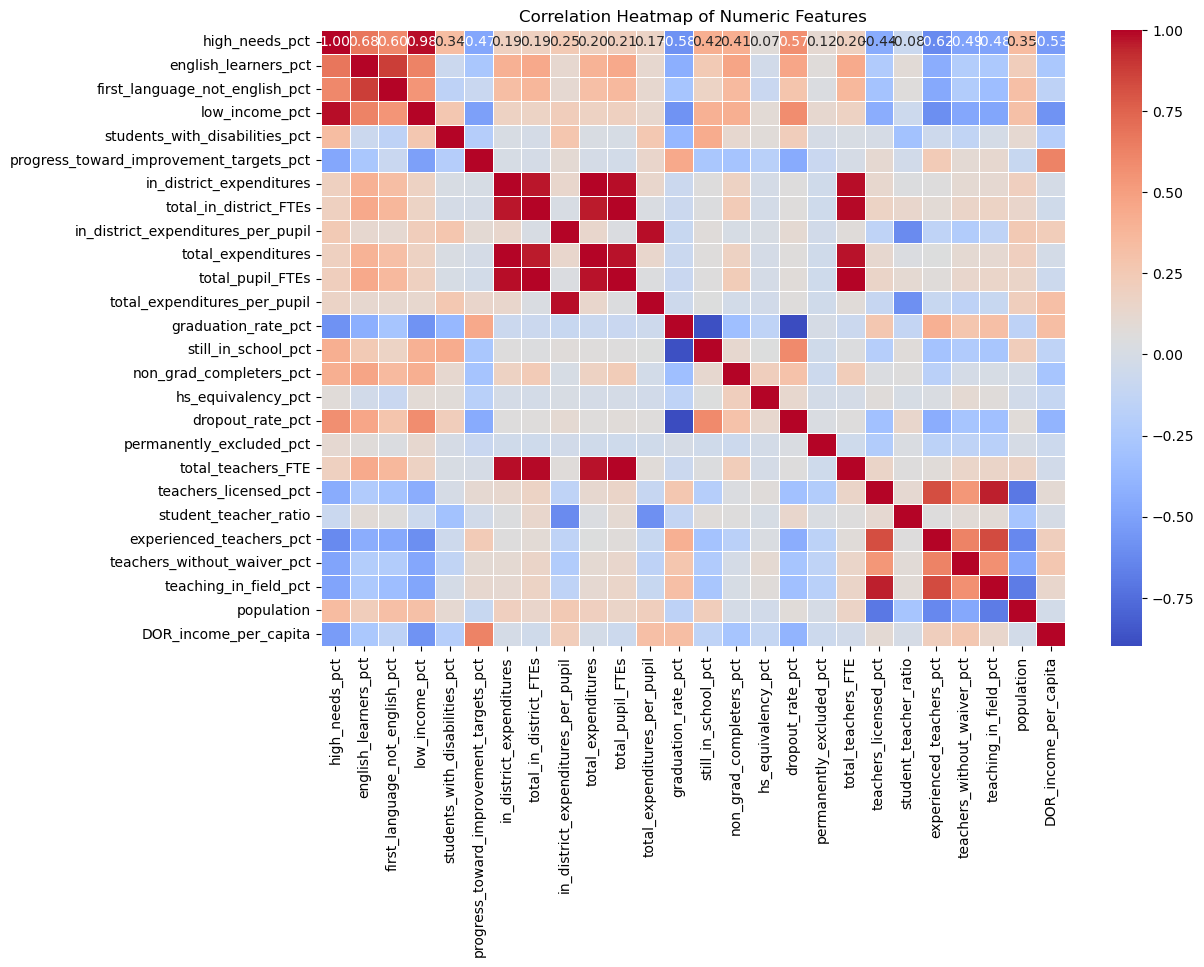

In [144]:
# E.T.
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)  # Ensures only numeric columns are included

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 3: Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Step 4: Add title and show plot
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


# E.T.
**Highly Positively Correlated (>= 0.7)**
| Feature 1                     | Feature 2                        | Corr ≈    |
| ----------------------------- | -------------------------------- | --------- |
| `high_needs_pct`              | `low_income_pct`                 | **0.90**  |
| `english_learners_pct`        | `first_language_not_english_pct` | **0.93**  |
| `in_district_expenditures`    | `total_expenditures`             | **≈1.00** |
| `total_in_district_FTEs`      | `total_teachers_FTE`             | **≈1.00** |
| `experienced_teachers_pct`    | `teaching_in_field_pct`          | **≈0.90** |
| `teachers_without_waiver_pct` | `teachers_licensed_pct`          | **≈0.90** |
| `in_district_expenditures`    | `total_in_district_FTEs`         | **≈0.90** |
| `total_pupil_FTEs`            | `total_expenditures`             | **≈0.90** |


# E.T.
**Highly Negatively Correlated (<= -0.7)**

| Feature 1             | Feature 2              | Corr ≈     |
| --------------------- | ---------------------- | ---------- |
| `graduation_rate_pct` | `dropout_rate_pct`     | **-0.90**  |
| `graduation_rate_pct` | `still_in_school_pct`  | **-0.87**  |
| `graduation_rate_pct` | `high_needs_pct`       | **-0.70+** |
| `graduation_rate_pct` | `low_income_pct`       | **-0.70+** |
| `graduation_rate_pct` | `english_learners_pct` | **-0.70+** |

Feature 2 has high correlation with graduation rate ( which is our target value)


# E.T.
#### Drop these columns, 

* first_language_not_english_pct
* total_expenditures
* total_teachers_FTE
* teaching_in_field_pct
* teachers_without_waiver_pct
* total_in_district_FTEs

In [145]:
# E.T.
columns_to_drop = [
    'first_language_not_english_pct',
    'total_expenditures',
    'total_teachers_FTE',
    'teaching_in_field_pct',
    'teachers_without_waiver_pct',
    'total_in_district_FTEs',
    'total_expenditures_per_pupil',
    'teachers_licensed_pct', 
    'total_pupil_FTEs'
]

df_clean = df.drop(columns=columns_to_drop)


In [146]:
df_clean.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,student_teacher_ratio,experienced_teachers_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,2.423144e+07,17114.65,100.0,0.0,0.0,0.0,0.0,0.0,11.9,81.5,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",317231.0,40029.375
Abington,47.3,11.0,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,3.560342e+07,16609.95,88.9,1.3,0.7,0.0,9.2,0.0,13.9,81.3,Abington,17062.0,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,1.280195e+07,27392.63,96.3,1.9,0.0,0.0,1.9,0.0,9.4,37.3,Boston,675647.0,55038.000
Acton-Boxborough,29.6,6.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,1.005648e+08,19407.68,96.1,3.2,0.2,0.0,0.4,0.0,13.0,88.3,"Acton, Boxborough",29527.0,69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,16.0,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,1.506501e+07,15623.23,99.3,0.7,0.0,0.0,0.0,0.0,12.0,80.8,"Clinton, Hudson, Marlborough, Maynard",88059.0,37880.000


In [147]:
df_clean.shape

(305, 20)

In [148]:
# E.T.
df_clean.dtypes

high_needs_pct                             float64
english_learners_pct                       float64
low_income_pct                             float64
students_with_disabilities_pct             float64
Overall_Classification                      object
Reason_for_Classification                   object
progress_toward_improvement_targets_pct    float64
in_district_expenditures                   float64
in_district_expenditures_per_pupil         float64
graduation_rate_pct                        float64
still_in_school_pct                        float64
non_grad_completers_pct                    float64
hs_equivalency_pct                         float64
dropout_rate_pct                           float64
permanently_excluded_pct                   float64
student_teacher_ratio                      float64
experienced_teachers_pct                   float64
members                                     object
population                                 float64
DOR_income_per_capita          

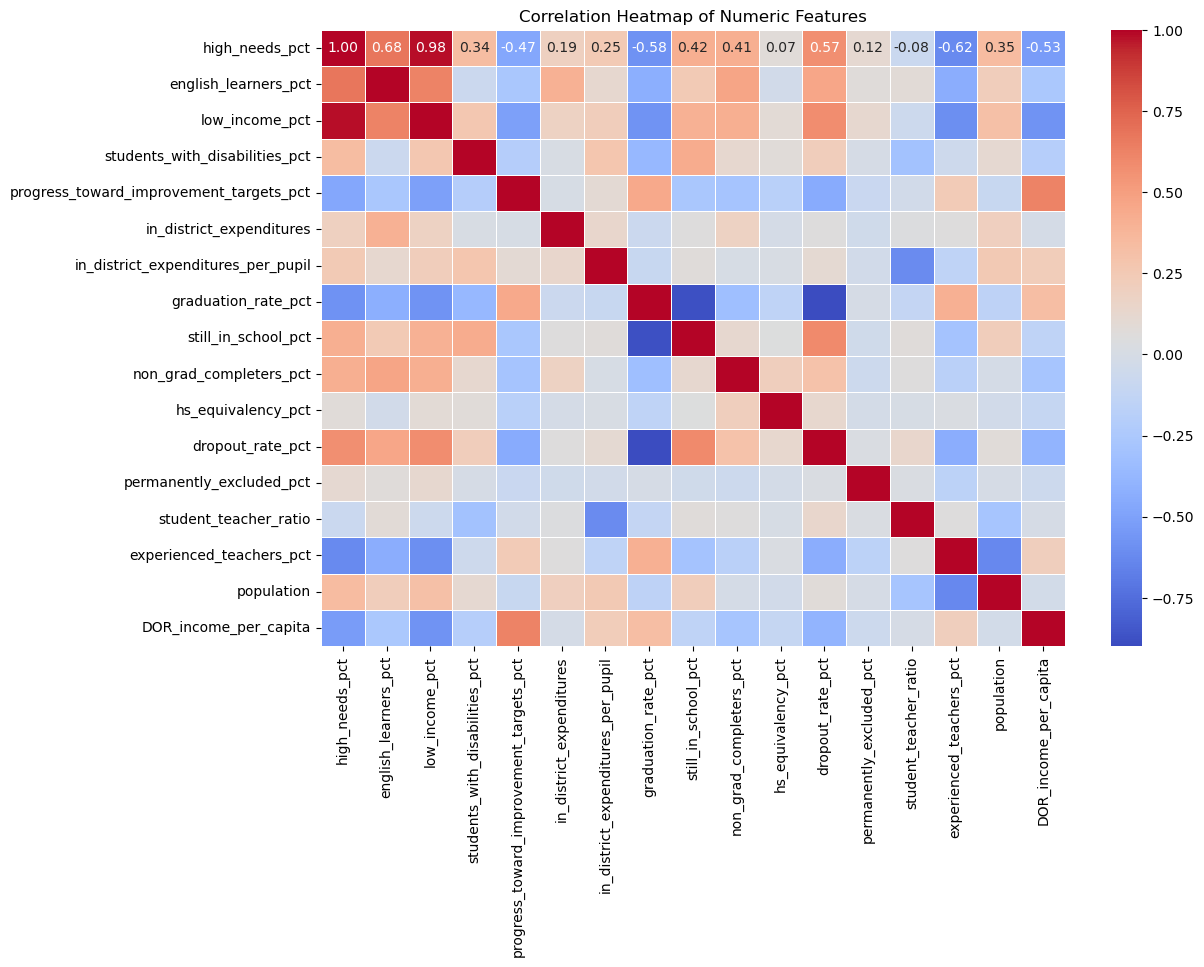

In [149]:
# E.T.
# after dropping columns, we will check the correlation matrix again
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation matrix
corr_matrix = df_clean.corr(numeric_only=True)  # Ensures only numeric columns are included

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 3: Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Step 4: Add title and show plot
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# E.T.
**Compute and sort correlations with Target value**

In [150]:
# E.T.
# Select only numeric columns
numeric_df = df_clean.select_dtypes(include='number')

# Calculate correlations with the target
target_corr = numeric_df.corr()['graduation_rate_pct'].sort_values(ascending=False)

# Drop the self-correlation (1.0)
target_corr = target_corr[target_corr.index != 'graduation_rate_pct']

# Display the correlation report
print("Correlation with graduation_rate_pct:")
print(target_corr)


Correlation with graduation_rate_pct:
progress_toward_improvement_targets_pct    0.447493
experienced_teachers_pct                   0.413792
DOR_income_per_capita                      0.327699
permanently_excluded_pct                  -0.006751
in_district_expenditures                  -0.073340
in_district_expenditures_per_pupil        -0.095499
student_teacher_ratio                     -0.116264
hs_equivalency_pct                        -0.148835
population                                -0.150290
non_grad_completers_pct                   -0.323723
students_with_disabilities_pct            -0.367327
english_learners_pct                      -0.425821
low_income_pct                            -0.577106
high_needs_pct                            -0.580776
still_in_school_pct                       -0.877541
dropout_rate_pct                          -0.898878
Name: graduation_rate_pct, dtype: float64


# E.T.
The column **"*permanently_excluded_pct, in_district_expenditures, population*"** has very weak correlation with target value. We can drop it.

In [151]:
# E.T.
columns_to_drop2 = [
    'permanently_excluded_pct',
    'in_district_expenditures', 
    'population'
]

df_clean = df_clean.drop(columns=columns_to_drop2)


In [152]:
df_clean.shape

(305, 17)

# E.T.
### Checking the OUTLIERS in a relationship with Target Value - graduation_rate_pct 


### Talk about these findings with team

These findings may appear to be outliers, but they might not actually be outliers. For instance, High percentages of English learners coupled with low graduation rates may seem unusual; however, this could represent a genuine situation. Instead of removing these cases, we should flag them. We can run our regression analysis both including and excluding these potential outliers. Afterwards, we can compare the results, including coefficients, R² values, and RMSE.

In [153]:
df_clean.dtypes

high_needs_pct                             float64
english_learners_pct                       float64
low_income_pct                             float64
students_with_disabilities_pct             float64
Overall_Classification                      object
Reason_for_Classification                   object
progress_toward_improvement_targets_pct    float64
in_district_expenditures_per_pupil         float64
graduation_rate_pct                        float64
still_in_school_pct                        float64
non_grad_completers_pct                    float64
hs_equivalency_pct                         float64
dropout_rate_pct                           float64
student_teacher_ratio                      float64
experienced_teachers_pct                   float64
members                                     object
DOR_income_per_capita                      float64
dtype: object

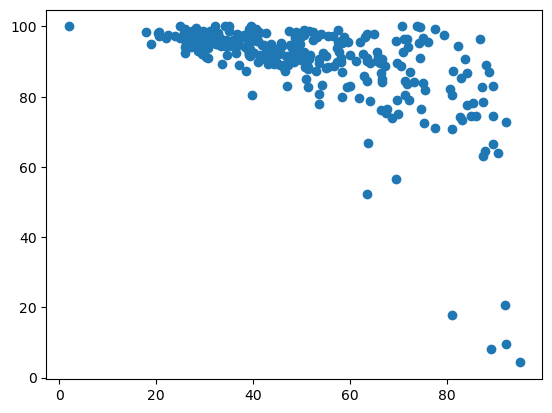

In [154]:
plt.scatter(x = 'high_needs_pct', y = 'graduation_rate_pct', data = df_clean)

In [155]:
df_clean.query('graduation_rate_pct < 60 and high_needs_pct > 80') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Boston Day and Evening Academy Charter (District),89.1,8.4,77.6,39.8,Insufficient data,Insufficient data,NaN,30662.39,8.0,56.3,1.1,0.0,34.5,10.9,89.8,Boston,55038.0
Map Academy Charter School (District),81.0,0.4,63.7,52.4,Requiring assistance or intervention,In need of focused/targeted support,18.0,18155.86,17.9,76.1,0.0,0.0,6.0,10.1,52.7,Map Academy Charter School (District),NaN
"Phoenix Academy Charter Public High School, Chelsea (District)",95.1,60.1,76.4,8.9,Insufficient data,Insufficient data,NaN,27966.58,4.3,40.4,0.0,0.0,55.3,17.0,18.4,"Phoenix Academy Charter Public High School, Ch...",NaN
"Phoenix Academy Public Charter High School, Lawrence (District)",92.0,12.8,88.0,25.6,Insufficient data,Insufficient data,NaN,24943.22,20.8,25.0,0.0,0.0,54.2,10.4,25.0,"Phoenix Academy Public Charter High School, La...",NaN
"Phoenix Academy Public Charter High School, Springfield (District)",92.2,8.4,91.6,24.7,Insufficient data,Insufficient data,NaN,24217.58,9.6,42.3,0.0,0.0,48.1,12.3,22.2,"Phoenix Academy Public Charter High School, Sp...",NaN


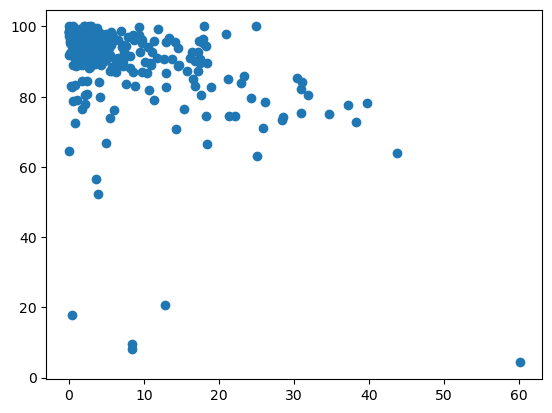

In [156]:
plt.scatter(x = 'english_learners_pct', y = 'graduation_rate_pct', data = df_clean)

In [157]:
df_clean.query('graduation_rate_pct < 40 and english_learners_pct > 50') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
"Phoenix Academy Charter Public High School, Chelsea (District)",95.1,60.1,76.4,8.9,Insufficient data,Insufficient data,NaN,27966.58,4.3,40.4,0.0,0.0,55.3,17.0,18.4,"Phoenix Academy Charter Public High School, Ch...",NaN


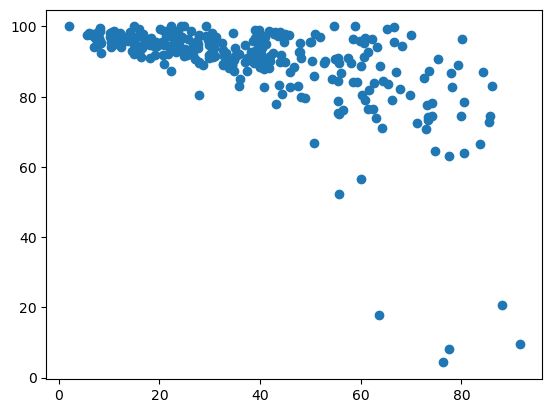

In [158]:
plt.scatter(x = 'low_income_pct', y = 'graduation_rate_pct', data = df_clean)

In [159]:
df_clean.query('graduation_rate_pct < 40 and low_income_pct > 60') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Boston Day and Evening Academy Charter (District),89.1,8.4,77.6,39.8,Insufficient data,Insufficient data,NaN,30662.39,8.0,56.3,1.1,0.0,34.5,10.9,89.8,Boston,55038.0
Map Academy Charter School (District),81.0,0.4,63.7,52.4,Requiring assistance or intervention,In need of focused/targeted support,18.0,18155.86,17.9,76.1,0.0,0.0,6.0,10.1,52.7,Map Academy Charter School (District),NaN
"Phoenix Academy Charter Public High School, Chelsea (District)",95.1,60.1,76.4,8.9,Insufficient data,Insufficient data,NaN,27966.58,4.3,40.4,0.0,0.0,55.3,17.0,18.4,"Phoenix Academy Charter Public High School, Ch...",NaN
"Phoenix Academy Public Charter High School, Lawrence (District)",92.0,12.8,88.0,25.6,Insufficient data,Insufficient data,NaN,24943.22,20.8,25.0,0.0,0.0,54.2,10.4,25.0,"Phoenix Academy Public Charter High School, La...",NaN
"Phoenix Academy Public Charter High School, Springfield (District)",92.2,8.4,91.6,24.7,Insufficient data,Insufficient data,NaN,24217.58,9.6,42.3,0.0,0.0,48.1,12.3,22.2,"Phoenix Academy Public Charter High School, Sp...",NaN


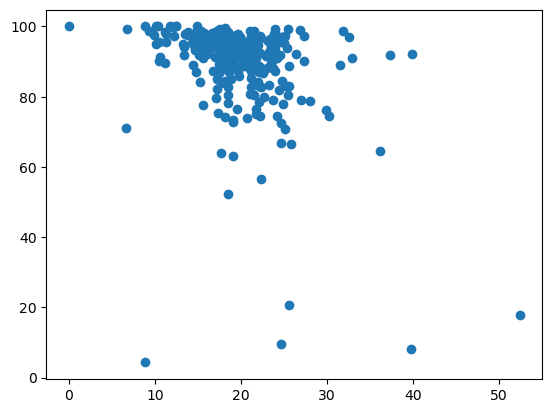

In [160]:
plt.scatter(x = 'students_with_disabilities_pct', y = 'graduation_rate_pct', data = df_clean)

In [161]:
df_clean.query('graduation_rate_pct < 40 and students_with_disabilities_pct >40') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Map Academy Charter School (District),81.0,0.4,63.7,52.4,Requiring assistance or intervention,In need of focused/targeted support,18.0,18155.86,17.9,76.1,0.0,0.0,6.0,10.1,52.7,Map Academy Charter School (District),NaN


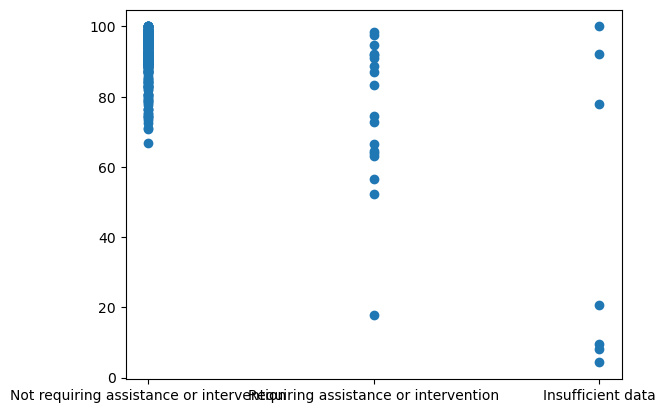

In [162]:
plt.scatter(x = 'Overall_Classification', y = 'graduation_rate_pct', data = df_clean)

In [163]:
df_clean.query('graduation_rate_pct < 40') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Boston Day and Evening Academy Charter (District),89.1,8.4,77.6,39.8,Insufficient data,Insufficient data,NaN,30662.39,8.0,56.3,1.1,0.0,34.5,10.9,89.8,Boston,55038.0
Map Academy Charter School (District),81.0,0.4,63.7,52.4,Requiring assistance or intervention,In need of focused/targeted support,18.0,18155.86,17.9,76.1,0.0,0.0,6.0,10.1,52.7,Map Academy Charter School (District),NaN
"Phoenix Academy Charter Public High School, Chelsea (District)",95.1,60.1,76.4,8.9,Insufficient data,Insufficient data,NaN,27966.58,4.3,40.4,0.0,0.0,55.3,17.0,18.4,"Phoenix Academy Charter Public High School, Ch...",NaN
"Phoenix Academy Public Charter High School, Lawrence (District)",92.0,12.8,88.0,25.6,Insufficient data,Insufficient data,NaN,24943.22,20.8,25.0,0.0,0.0,54.2,10.4,25.0,"Phoenix Academy Public Charter High School, La...",NaN
"Phoenix Academy Public Charter High School, Springfield (District)",92.2,8.4,91.6,24.7,Insufficient data,Insufficient data,NaN,24217.58,9.6,42.3,0.0,0.0,48.1,12.3,22.2,"Phoenix Academy Public Charter High School, Sp...",NaN


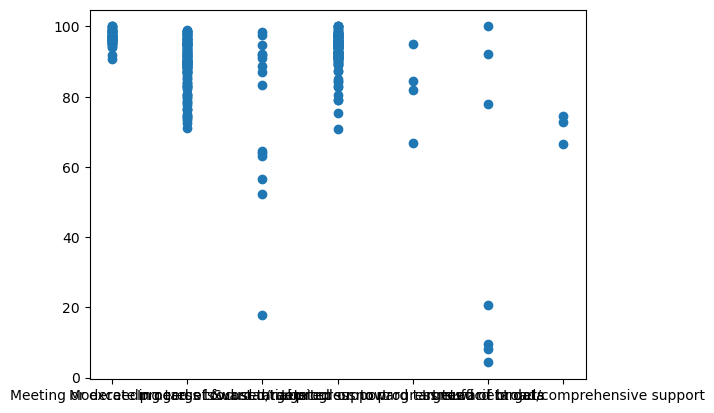

In [164]:
plt.scatter(x = 'Reason_for_Classification', y = 'graduation_rate_pct', data = df_clean)

In [165]:
df_clean.query('graduation_rate_pct < 40') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Boston Day and Evening Academy Charter (District),89.1,8.4,77.6,39.8,Insufficient data,Insufficient data,NaN,30662.39,8.0,56.3,1.1,0.0,34.5,10.9,89.8,Boston,55038.0
Map Academy Charter School (District),81.0,0.4,63.7,52.4,Requiring assistance or intervention,In need of focused/targeted support,18.0,18155.86,17.9,76.1,0.0,0.0,6.0,10.1,52.7,Map Academy Charter School (District),NaN
"Phoenix Academy Charter Public High School, Chelsea (District)",95.1,60.1,76.4,8.9,Insufficient data,Insufficient data,NaN,27966.58,4.3,40.4,0.0,0.0,55.3,17.0,18.4,"Phoenix Academy Charter Public High School, Ch...",NaN
"Phoenix Academy Public Charter High School, Lawrence (District)",92.0,12.8,88.0,25.6,Insufficient data,Insufficient data,NaN,24943.22,20.8,25.0,0.0,0.0,54.2,10.4,25.0,"Phoenix Academy Public Charter High School, La...",NaN
"Phoenix Academy Public Charter High School, Springfield (District)",92.2,8.4,91.6,24.7,Insufficient data,Insufficient data,NaN,24217.58,9.6,42.3,0.0,0.0,48.1,12.3,22.2,"Phoenix Academy Public Charter High School, Sp...",NaN


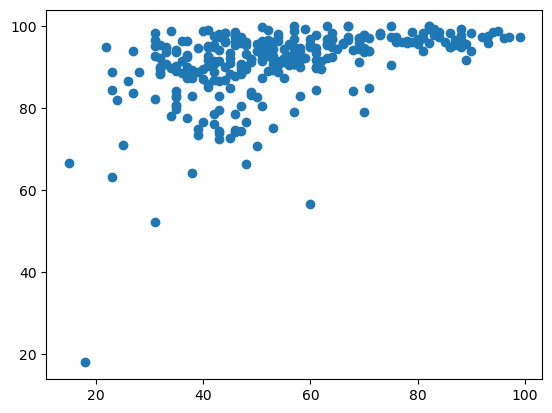

In [166]:
plt.scatter(x = 'progress_toward_improvement_targets_pct', y = 'graduation_rate_pct', data = df_clean)

In [167]:
df_clean.query('graduation_rate_pct < 40 and progress_toward_improvement_targets_pct< 20') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Map Academy Charter School (District),81.0,0.4,63.7,52.4,Requiring assistance or intervention,In need of focused/targeted support,18.0,18155.86,17.9,76.1,0.0,0.0,6.0,10.1,52.7,Map Academy Charter School (District),NaN


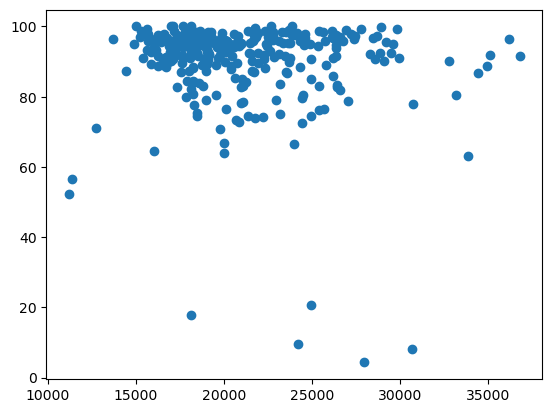

In [168]:
plt.scatter(x = 'in_district_expenditures_per_pupil', y = 'graduation_rate_pct', data = df_clean)

In [169]:
df_clean.query('graduation_rate_pct < 40') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Boston Day and Evening Academy Charter (District),89.1,8.4,77.6,39.8,Insufficient data,Insufficient data,NaN,30662.39,8.0,56.3,1.1,0.0,34.5,10.9,89.8,Boston,55038.0
Map Academy Charter School (District),81.0,0.4,63.7,52.4,Requiring assistance or intervention,In need of focused/targeted support,18.0,18155.86,17.9,76.1,0.0,0.0,6.0,10.1,52.7,Map Academy Charter School (District),NaN
"Phoenix Academy Charter Public High School, Chelsea (District)",95.1,60.1,76.4,8.9,Insufficient data,Insufficient data,NaN,27966.58,4.3,40.4,0.0,0.0,55.3,17.0,18.4,"Phoenix Academy Charter Public High School, Ch...",NaN
"Phoenix Academy Public Charter High School, Lawrence (District)",92.0,12.8,88.0,25.6,Insufficient data,Insufficient data,NaN,24943.22,20.8,25.0,0.0,0.0,54.2,10.4,25.0,"Phoenix Academy Public Charter High School, La...",NaN
"Phoenix Academy Public Charter High School, Springfield (District)",92.2,8.4,91.6,24.7,Insufficient data,Insufficient data,NaN,24217.58,9.6,42.3,0.0,0.0,48.1,12.3,22.2,"Phoenix Academy Public Charter High School, Sp...",NaN


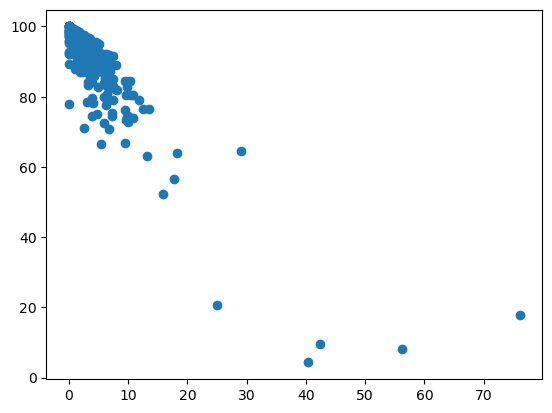

In [170]:
plt.scatter(x = 'still_in_school_pct', y = 'graduation_rate_pct', data = df_clean)

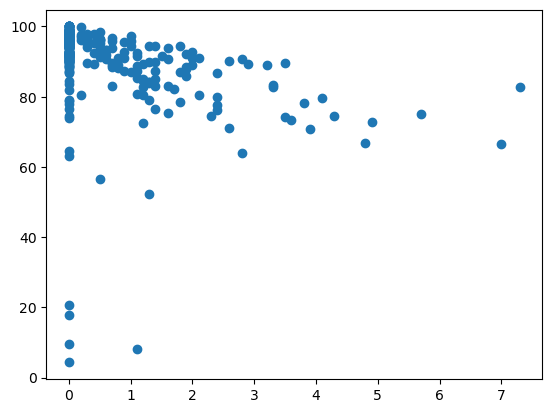

In [171]:
plt.scatter(x = 'non_grad_completers_pct', y = 'graduation_rate_pct', data = df_clean)

In [172]:
df_clean.query('graduation_rate_pct < 25 and non_grad_completers_pct<2') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Boston Day and Evening Academy Charter (District),89.1,8.4,77.6,39.8,Insufficient data,Insufficient data,NaN,30662.39,8.0,56.3,1.1,0.0,34.5,10.9,89.8,Boston,55038.0
Map Academy Charter School (District),81.0,0.4,63.7,52.4,Requiring assistance or intervention,In need of focused/targeted support,18.0,18155.86,17.9,76.1,0.0,0.0,6.0,10.1,52.7,Map Academy Charter School (District),NaN
"Phoenix Academy Charter Public High School, Chelsea (District)",95.1,60.1,76.4,8.9,Insufficient data,Insufficient data,NaN,27966.58,4.3,40.4,0.0,0.0,55.3,17.0,18.4,"Phoenix Academy Charter Public High School, Ch...",NaN
"Phoenix Academy Public Charter High School, Lawrence (District)",92.0,12.8,88.0,25.6,Insufficient data,Insufficient data,NaN,24943.22,20.8,25.0,0.0,0.0,54.2,10.4,25.0,"Phoenix Academy Public Charter High School, La...",NaN
"Phoenix Academy Public Charter High School, Springfield (District)",92.2,8.4,91.6,24.7,Insufficient data,Insufficient data,NaN,24217.58,9.6,42.3,0.0,0.0,48.1,12.3,22.2,"Phoenix Academy Public Charter High School, Sp...",NaN


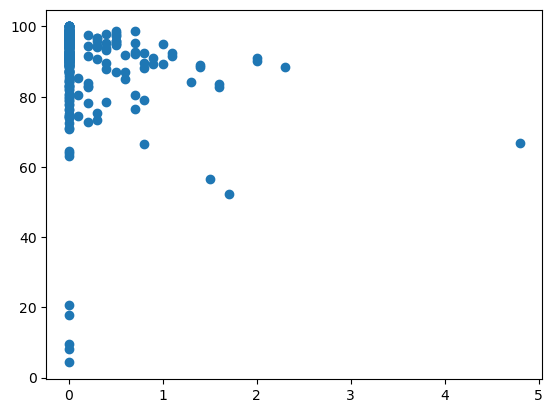

In [173]:
plt.scatter(x = 'hs_equivalency_pct', y = 'graduation_rate_pct', data = df_clean)

In [174]:
df_clean.query('graduation_rate_pct < 80 and hs_equivalency_pct>4') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
North Brookfield,63.7,5.0,50.7,24.6,Not requiring assistance or intervention,Limited or no progress toward targets,15.0,20008.84,66.7,9.5,4.8,4.8,14.3,10.8,74.7,North Brookfield,30230.0


In [175]:
df_clean.query('hs_equivalency_pct>4') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
North Brookfield,63.7,5.0,50.7,24.6,Not requiring assistance or intervention,Limited or no progress toward targets,15.0,20008.84,66.7,9.5,4.8,4.8,14.3,10.8,74.7,North Brookfield,30230.0


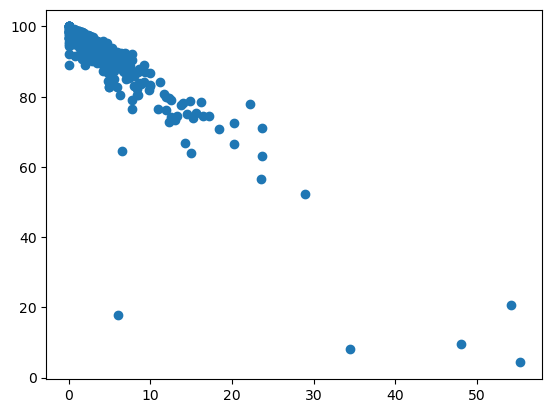

In [176]:
plt.scatter(x = 'dropout_rate_pct', y = 'graduation_rate_pct', data = df_clean)

In [177]:
df_clean.query('graduation_rate_pct < 20 and dropout_rate_pct<10') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Map Academy Charter School (District),81.0,0.4,63.7,52.4,Requiring assistance or intervention,In need of focused/targeted support,18.0,18155.86,17.9,76.1,0.0,0.0,6.0,10.1,52.7,Map Academy Charter School (District),NaN


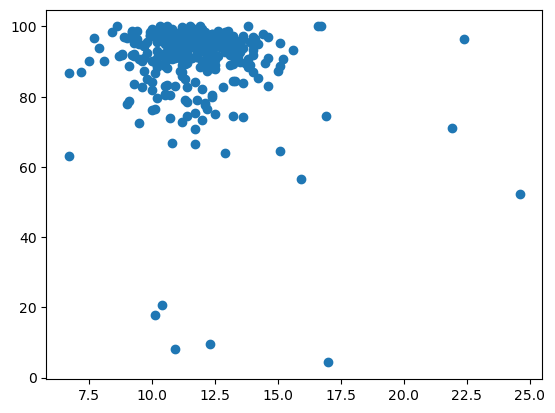

In [178]:
plt.scatter(x = 'student_teacher_ratio', y = 'graduation_rate_pct', data = df_clean)

In [179]:
df_clean.query('graduation_rate_pct < 25 and student_teacher_ratio<18') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Boston Day and Evening Academy Charter (District),89.1,8.4,77.6,39.8,Insufficient data,Insufficient data,NaN,30662.39,8.0,56.3,1.1,0.0,34.5,10.9,89.8,Boston,55038.0
Map Academy Charter School (District),81.0,0.4,63.7,52.4,Requiring assistance or intervention,In need of focused/targeted support,18.0,18155.86,17.9,76.1,0.0,0.0,6.0,10.1,52.7,Map Academy Charter School (District),NaN
"Phoenix Academy Charter Public High School, Chelsea (District)",95.1,60.1,76.4,8.9,Insufficient data,Insufficient data,NaN,27966.58,4.3,40.4,0.0,0.0,55.3,17.0,18.4,"Phoenix Academy Charter Public High School, Ch...",NaN
"Phoenix Academy Public Charter High School, Lawrence (District)",92.0,12.8,88.0,25.6,Insufficient data,Insufficient data,NaN,24943.22,20.8,25.0,0.0,0.0,54.2,10.4,25.0,"Phoenix Academy Public Charter High School, La...",NaN
"Phoenix Academy Public Charter High School, Springfield (District)",92.2,8.4,91.6,24.7,Insufficient data,Insufficient data,NaN,24217.58,9.6,42.3,0.0,0.0,48.1,12.3,22.2,"Phoenix Academy Public Charter High School, Sp...",NaN


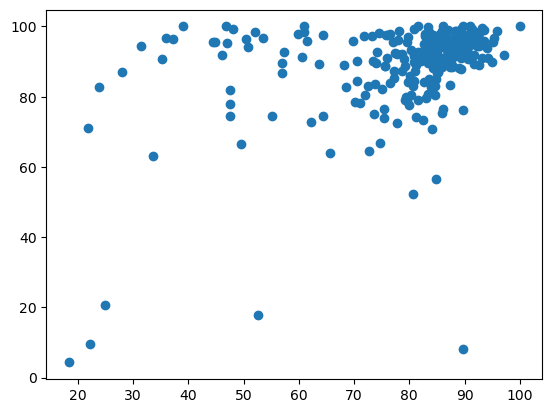

In [180]:
plt.scatter(x = 'experienced_teachers_pct', y = 'graduation_rate_pct', data = df_clean)

In [181]:
df_clean.query('graduation_rate_pct < 25 and experienced_teachers_pct>80') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Boston Day and Evening Academy Charter (District),89.1,8.4,77.6,39.8,Insufficient data,Insufficient data,NaN,30662.39,8.0,56.3,1.1,0.0,34.5,10.9,89.8,Boston,55038.0


In [182]:
df_clean.query('graduation_rate_pct > 60 and experienced_teachers_pct<28') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Collegiate Charter School of Lowell (District),77.5,25.9,64.3,6.6,Not requiring assistance or intervention,Moderate progress toward targets,25.0,12744.87,71.1,2.6,2.6,0.0,23.7,21.9,21.8,Collegiate Charter School of Lowell (District),NaN
Roxbury Preparatory Charter (District),87.3,19.0,78.2,18.5,Not requiring assistance or intervention,Substantial progress toward targets,50.0,26399.94,82.8,7.4,3.3,1.6,4.9,11.4,23.8,Boston,55038.0


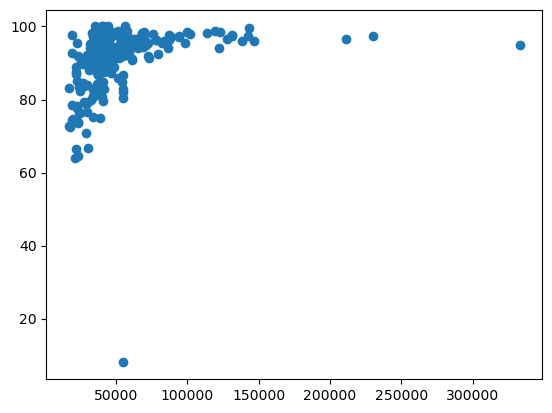

In [183]:
plt.scatter(x = 'DOR_income_per_capita', y = 'graduation_rate_pct', data = df_clean)

In [184]:
df_clean.query('graduation_rate_pct >80 and DOR_income_per_capita > 300000') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Weston,27.6,3.3,7.9,17.2,Not requiring assistance or intervention,Meeting or exceeding targets,86.0,29581.26,95.0,4.4,0.0,0.0,0.6,11.9,82.6,Weston,333105.0


In [185]:
df_clean.query('graduation_rate_pct <20 and DOR_income_per_capita <60000') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Boston Day and Evening Academy Charter (District),89.1,8.4,77.6,39.8,Insufficient data,Insufficient data,NaN,30662.39,8.0,56.3,1.1,0.0,34.5,10.9,89.8,Boston,55038.0


In [186]:
df_clean.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,17114.65,100.0,0.0,0.0,0.0,0.0,11.9,81.5,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",40029.375
Abington,47.3,11.0,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,16609.95,88.9,1.3,0.7,0.0,9.2,13.9,81.3,Abington,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,27392.63,96.3,1.9,0.0,0.0,1.9,9.4,37.3,Boston,55038.000
Acton-Boxborough,29.6,6.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,19407.68,96.1,3.2,0.2,0.0,0.4,13.0,88.3,"Acton, Boxborough",69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,16.0,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,15623.23,99.3,0.7,0.0,0.0,0.0,12.0,80.8,"Clinton, Hudson, Marlborough, Maynard",37880.000


In [187]:
# E.T.
# drop the members variable.abs 

df_clean.drop(columns='members',inplace= True)

# E.T.
#### Encoding the categorical values

In [188]:
df_clean['Overall_Classification'].unique()

array(['Not requiring assistance or intervention',
       'Requiring assistance or intervention', 'Insufficient data'],
      dtype=object)

In [189]:
df_clean['Reason_for_Classification'].unique()

array(['Meeting or exceeding targets', 'Moderate progress toward targets',
       'In need of focused/targeted support',
       'Substantial progress toward targets',
       'Limited or no progress toward targets', 'Insufficient data',
       'In need of broad/comprehensive support'], dtype=object)

# E.T.
**There are 3 categories in Overall_Classification, and 7 categories in Reason_for _Classification features. There is also "insufficient data" in both columns that we need to address before we do One Hot Encoding**

In [190]:
## Value counts for each categorical variables

df_clean['Overall_Classification'].value_counts()

Overall_Classification
Not requiring assistance or intervention    280
Requiring assistance or intervention         18
Insufficient data                             7
Name: count, dtype: int64

In [191]:
df_clean['Reason_for_Classification'].value_counts()

Reason_for_Classification
Moderate progress toward targets          119
Substantial progress toward targets       111
Meeting or exceeding targets               46
In need of focused/targeted support        15
Insufficient data                           7
Limited or no progress toward targets       4
In need of broad/comprehensive support      3
Name: count, dtype: int64

In [192]:
# Rows where Overall_Classification is 'Insufficient data'
print(df_clean[df_clean['Overall_Classification'] == 'Insufficient data'][['graduation_rate_pct']])


# Rows where Reason_for_Classification is 'Insufficient data'
print(df_clean[df_clean['Reason_for_Classification'] == 'Insufficient data'][['graduation_rate_pct']])


                                                    graduation_rate_pct
District Name                                                          
Boston Day and Evening Academy Charter (District)                   8.0
Hatfield                                                           92.3
Ma Academy for Math and Science                                   100.0
Martha's Vineyard Charter Public School (District)                 77.8
Phoenix Academy Charter Public High School, Che...                  4.3
Phoenix Academy Public Charter High School, Law...                 20.8
Phoenix Academy Public Charter High School, Spr...                  9.6
                                                    graduation_rate_pct
District Name                                                          
Boston Day and Evening Academy Charter (District)                   8.0
Hatfield                                                           92.3
Ma Academy for Math and Science                                 

# E.T.
**These schools have insufficient data in categorical variables because some of these serves over-age or non traditinoanl students. cohort are often small or inconsistent.**

In [193]:
# Lets see how many school name has "charter" in their name 
charter_schools = df_clean[df_clean.index.str.contains("charter", case=False)]

# Print number of charter schools
print(f"Number of schools/districts with 'charter' in the name: {len(charter_schools)}")


Number of schools/districts with 'charter' in the name: 48


In [194]:
df_clean.shape

(305, 16)

In [195]:
# E.T.
## Drop the rows which has "insufficent data" in either categorical columns 

df_clean = df_clean[
    (df_clean['Overall_Classification'] != 'Insufficient data') &
    (df_clean['Reason_for_Classification'] != 'Insufficient data')]

In [196]:
df_clean.shape

(298, 16)

In [197]:
df_clean['Overall_Classification'].value_counts()

Overall_Classification
Not requiring assistance or intervention    280
Requiring assistance or intervention         18
Name: count, dtype: int64

In [198]:
df_clean['Reason_for_Classification'].value_counts()

Reason_for_Classification
Moderate progress toward targets          119
Substantial progress toward targets       111
Meeting or exceeding targets               46
In need of focused/targeted support        15
Limited or no progress toward targets       4
In need of broad/comprehensive support      3
Name: count, dtype: int64

In [199]:
df_clean.columns

Index(['high_needs_pct', 'english_learners_pct', 'low_income_pct',
       'students_with_disabilities_pct', 'Overall_Classification',
       'Reason_for_Classification', 'progress_toward_improvement_targets_pct',
       'in_district_expenditures_per_pupil', 'graduation_rate_pct',
       'still_in_school_pct', 'non_grad_completers_pct', 'hs_equivalency_pct',
       'dropout_rate_pct', 'student_teacher_ratio', 'experienced_teachers_pct',
       'DOR_income_per_capita'],
      dtype='object')

In [200]:
# Summary stats
df_clean[['graduation_rate_pct', 'in_district_expenditures_per_pupil', 'student_teacher_ratio']].describe()

,graduation_rate_pct,in_district_expenditures_per_pupil,student_teacher_ratio
count,298.000000,298.000000,297.000000
mean,90.976846,20969.313691,11.722559
std,8.953736,4322.272357,2.003442
min,17.900000,11201.030000,6.700000
25%,88.900000,17908.752500,10.500000
50%,93.800000,19993.535000,11.600000
75%,96.475000,23570.617500,12.700000
max,100.000000,36789.060000,24.600000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


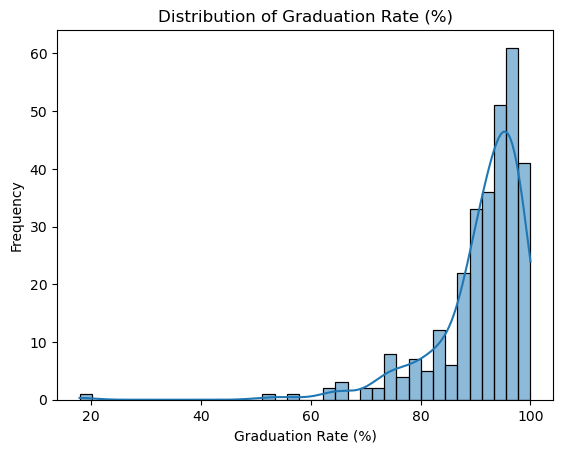

In [201]:
# F.R. & E.T.
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram and KDE for Graduation Rate
sns.histplot(df_clean['graduation_rate_pct'], kde=True)
plt.title("Distribution of Graduation Rate (%)")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()


In [202]:
df_clean.columns

Index(['high_needs_pct', 'english_learners_pct', 'low_income_pct',
       'students_with_disabilities_pct', 'Overall_Classification',
       'Reason_for_Classification', 'progress_toward_improvement_targets_pct',
       'in_district_expenditures_per_pupil', 'graduation_rate_pct',
       'still_in_school_pct', 'non_grad_completers_pct', 'hs_equivalency_pct',
       'dropout_rate_pct', 'student_teacher_ratio', 'experienced_teachers_pct',
       'DOR_income_per_capita'],
      dtype='object')

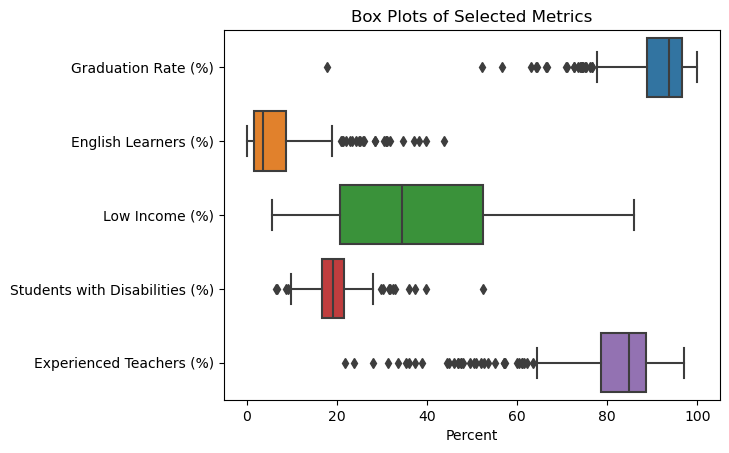

In [203]:
#A.F. & E.T.
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy with nicer column labels
plot_df = df_clean[[
    'graduation_rate_pct',
    'english_learners_pct',
    'low_income_pct',
    'students_with_disabilities_pct',
    'experienced_teachers_pct'
]].rename(columns={
    'graduation_rate_pct': 'Graduation Rate (%)',
    'english_learners_pct': 'English Learners (%)',
    'low_income_pct': 'Low Income (%)',
    'students_with_disabilities_pct': 'Students with Disabilities (%)',
    'experienced_teachers_pct': 'Experienced Teachers (%)'
})

# Create box plots
sns.boxplot(data=plot_df, orient='h')
plt.title("Box Plots of Selected Metrics")
plt.xlabel("Percent")
plt.show()



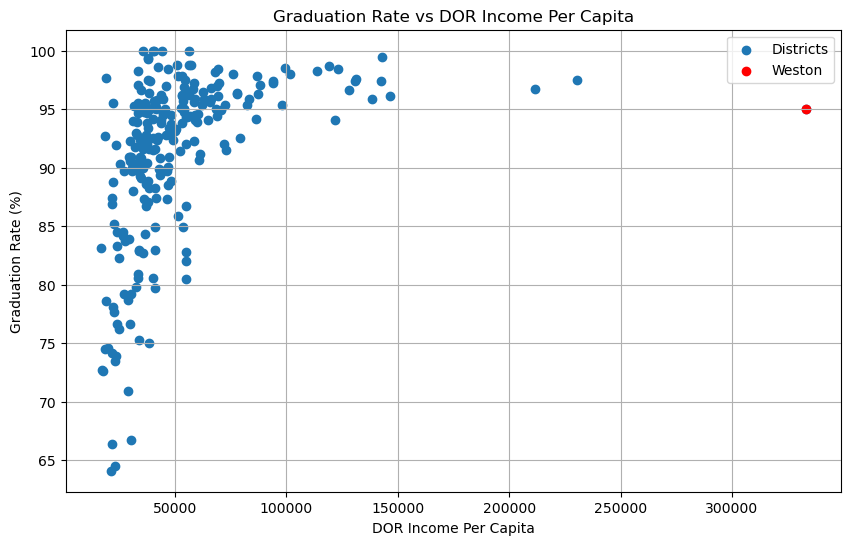

In [204]:
# E.T. # Create a scatterplot to visualize the relationship between DOR income per capita and graduation rate
import matplotlib.pyplot as plt

# Create base scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['DOR_income_per_capita'], df_clean['graduation_rate_pct'], label='Districts')

# Highlight Weston
weston = df_clean.query('graduation_rate_pct > 80 and DOR_income_per_capita > 300000')
plt.scatter(weston['DOR_income_per_capita'], weston['graduation_rate_pct'], color='red', label='Weston')


# Plot aesthetics
plt.xlabel('DOR Income Per Capita')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rate vs DOR Income Per Capita')
plt.legend()
plt.grid(True)
plt.show()


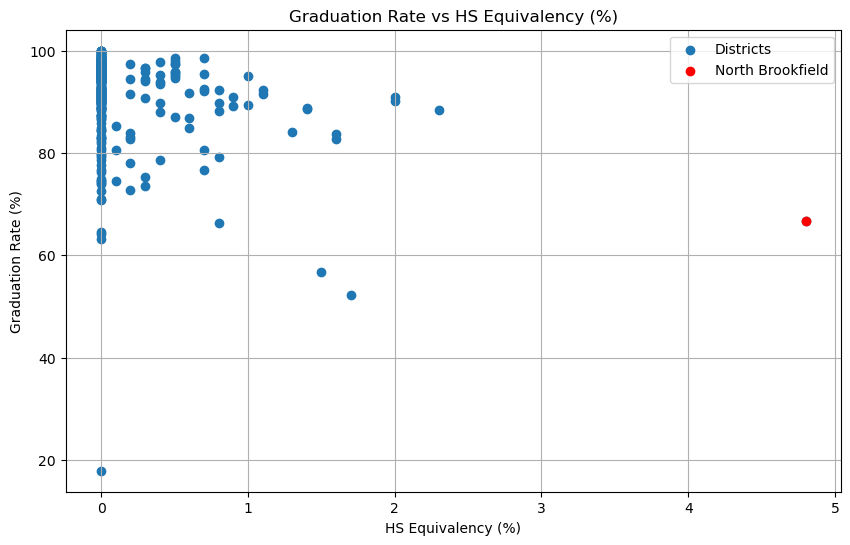

In [205]:
# E.T.# Create a scatterplot to visualize the relationship between HS Equivalency and Graduation Rate
import matplotlib.pyplot as plt

# Create base scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['hs_equivalency_pct'], df_clean['graduation_rate_pct'], label='Districts')

# Highlight North Brookfield in red
nb = df_clean.query('graduation_rate_pct < 80 and hs_equivalency_pct > 4')
plt.scatter(nb['hs_equivalency_pct'], nb['graduation_rate_pct'], color='red', label='North Brookfield')

# Plot aesthetics
plt.xlabel('HS Equivalency (%)')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rate vs HS Equivalency (%)')
plt.legend()
plt.grid(True)
plt.show()


In [206]:
df_clean.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,17114.65,100.0,0.0,0.0,0.0,0.0,11.9,81.5,40029.375
Abington,47.3,11.0,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,16609.95,88.9,1.3,0.7,0.0,9.2,13.9,81.3,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,27392.63,96.3,1.9,0.0,0.0,1.9,9.4,37.3,55038.000
Acton-Boxborough,29.6,6.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,19407.68,96.1,3.2,0.2,0.0,0.4,13.0,88.3,69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,16.0,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,15623.23,99.3,0.7,0.0,0.0,0.0,12.0,80.8,37880.000


In [207]:
# E.T.
# Lets see how many school name has "charter" in their name 
charter_schools = df_clean[df_clean.index.str.contains("charter", case=False)]

# Print number of charter schools
print(f"Number of schools/districts with 'charter' in the name: {len(charter_schools)}")


Number of schools/districts with 'charter' in the name: 43


In [208]:
df_clean.shape

(298, 16)

In [209]:
# E.T.
# Drop rows where the district or school name contains 'Charter'
df_clean = df_clean[~df_clean.index.str.contains("Charter", case=False)]


In [210]:
df_clean.shape

(255, 16)

In [211]:
df_clean['Overall_Classification'].value_counts()

Overall_Classification
Not requiring assistance or intervention    243
Requiring assistance or intervention         12
Name: count, dtype: int64

In [212]:
df_clean['Reason_for_Classification'].value_counts()

Reason_for_Classification
Moderate progress toward targets          100
Substantial progress toward targets        99
Meeting or exceeding targets               41
In need of focused/targeted support         9
Limited or no progress toward targets       3
In need of broad/comprehensive support      3
Name: count, dtype: int64

In [213]:
df_clean.isna().sum()

high_needs_pct                              0
english_learners_pct                        0
low_income_pct                              0
students_with_disabilities_pct              0
Overall_Classification                      0
Reason_for_Classification                   0
progress_toward_improvement_targets_pct     0
in_district_expenditures_per_pupil          0
graduation_rate_pct                         0
still_in_school_pct                         0
non_grad_completers_pct                     0
hs_equivalency_pct                          0
dropout_rate_pct                            0
student_teacher_ratio                       0
experienced_teachers_pct                    0
DOR_income_per_capita                      40
dtype: int64

In [214]:
# E.T.
df_clean[df_clean['DOR_income_per_capita'].isnull()].head()

## We should check these schools before we go deep in preprocessing, also do we want to keep this feature? 

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,
Assabet Valley Regional Vocational Technical,58.9,5.9,41.0,24.1,Not requiring assistance or intervention,Substantial progress toward targets,64.0,26584.56,97.0,0.0,0.0,0.0,3.0,10.1,88.3,NaN
Ayer Shirley School District,45.5,4.3,32.6,19.3,Not requiring assistance or intervention,Moderate progress toward targets,42.0,19521.74,88.9,7.1,2.0,0.0,2.0,11.2,85.0,NaN
Blackstone Valley Regional Vocational Technical,25.0,0.5,15.0,12.5,Not requiring assistance or intervention,Meeting or exceeding targets,75.0,23876.13,100.0,0.0,0.0,0.0,0.0,11.5,89.7,NaN
Blue Hills Regional Vocational Technical,57.5,1.1,39.8,26.8,Not requiring assistance or intervention,Meeting or exceeding targets,95.0,26919.92,99.0,0.5,0.0,0.0,0.5,11.4,93.6,NaN
Bristol County Agricultural,41.3,0.0,30.4,15.7,Not requiring assistance or intervention,Substantial progress toward targets,54.0,24138.96,98.1,0.0,0.0,0.0,1.9,11.7,74.5,NaN


# E.T.
### Lets start the one hot encoding for categorical variables
#### One-hot encode the categorical variables

In [215]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Define your categorical columns
categorical_cols = ['Overall_Classification', 'Reason_for_Classification']

# Create OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Fit and transform the categorical data
ohe_array = ohe.fit_transform(df_clean[categorical_cols])

# Get the new column names AFTER fitting
ohe_columns = ohe.get_feature_names_out(categorical_cols)

# Convert to DataFrame
df_ohe = pd.DataFrame(ohe_array, columns=ohe_columns, index=df_clean.index)

# Drop original categorical columns and concatenate encoded ones
df_encoded = pd.concat([df_clean.drop(columns=categorical_cols), df_ohe], axis=1)
df_encoded.shape
df_encoded.head()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,Overall_Classification_Not requiring assistance or intervention,Overall_Classification_Requiring assistance or intervention,Reason_for_Classification_In need of broad/comprehensive support,Reason_for_Classification_In need of focused/targeted support,Reason_for_Classification_Limited or no progress toward targets,Reason_for_Classification_Meeting or exceeding targets,Reason_for_Classification_Moderate progress toward targets,Reason_for_Classification_Substantial progress toward targets
District Name,,,,,,,,,,,,,,,,,,,,,,
Abington,47.3,11.0,34.4,17.8,39.0,16609.95,88.9,1.3,0.7,0.0,9.2,13.9,81.3,37848.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Acton-Boxborough,29.6,6.2,10.6,15.5,85.0,19407.68,96.1,3.2,0.2,0.0,0.4,13.0,88.3,69189.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Agawam,51.4,6.2,40.7,18.3,46.0,20414.91,88.0,1.1,1.9,0.4,8.6,12.5,89.4,31126.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Amesbury,46.4,2.7,33.8,23.7,47.0,22338.70,88.3,2.5,0.8,0.8,7.5,10.6,89.0,41139.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Amherst-Pelham,44.0,7.3,29.8,24.2,33.0,26177.60,90.9,4.1,0.9,0.9,3.2,10.2,81.3,34325.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [216]:
df_encoded.shape

(255, 22)

In [217]:
df_encoded.isnull().sum()

high_needs_pct                                                       0
english_learners_pct                                                 0
low_income_pct                                                       0
students_with_disabilities_pct                                       0
progress_toward_improvement_targets_pct                              0
in_district_expenditures_per_pupil                                   0
graduation_rate_pct                                                  0
still_in_school_pct                                                  0
non_grad_completers_pct                                              0
hs_equivalency_pct                                                   0
dropout_rate_pct                                                     0
student_teacher_ratio                                                0
experienced_teachers_pct                                             0
DOR_income_per_capita                                               40
Overal

In [218]:
df_encoded.dtypes

high_needs_pct                                                      float64
english_learners_pct                                                float64
low_income_pct                                                      float64
students_with_disabilities_pct                                      float64
progress_toward_improvement_targets_pct                             float64
in_district_expenditures_per_pupil                                  float64
graduation_rate_pct                                                 float64
still_in_school_pct                                                 float64
non_grad_completers_pct                                             float64
hs_equivalency_pct                                                  float64
dropout_rate_pct                                                    float64
student_teacher_ratio                                               float64
experienced_teachers_pct                                            float64
DOR_income_p

In [219]:
# E.T.
df_clean[df_clean['DOR_income_per_capita'].isnull()]


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,Overall_Classification,Reason_for_Classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,
Assabet Valley Regional Vocational Technical,58.9,5.9,41.0,24.1,Not requiring assistance or intervention,Substantial progress toward targets,64.0,26584.56,97.0,0.0,0.0,0.0,3.0,10.1,88.3,NaN
Ayer Shirley School District,45.5,4.3,32.6,19.3,Not requiring assistance or intervention,Moderate progress toward targets,42.0,19521.74,88.9,7.1,2.0,0.0,2.0,11.2,85.0,NaN
Blackstone Valley Regional Vocational Technical,25.0,0.5,15.0,12.5,Not requiring assistance or intervention,Meeting or exceeding targets,75.0,23876.13,100.0,0.0,0.0,0.0,0.0,11.5,89.7,NaN
Blue Hills Regional Vocational Technical,57.5,1.1,39.8,26.8,Not requiring assistance or intervention,Meeting or exceeding targets,95.0,26919.92,99.0,0.5,0.0,0.0,0.5,11.4,93.6,NaN
Bristol County Agricultural,41.3,0.0,30.4,15.7,Not requiring assistance or intervention,Substantial progress toward targets,54.0,24138.96,98.1,0.0,0.0,0.0,1.9,11.7,74.5,NaN
Bristol-Plymouth Regional Vocational Technical,40.8,0.5,30.8,15.2,Not requiring assistance or intervention,Substantial progress toward targets,69.0,24304.53,96.0,0.6,0.0,0.0,3.4,12.9,86.7,NaN
Cape Cod Regional Vocational Technical,56.5,2.4,43.5,22.2,Not requiring assistance or intervention,Meeting or exceeding targets,76.0,27400.62,97.4,0.6,0.0,0.0,1.9,10.5,73.2,NaN
Dudley-Charlton Reg,44.3,3.5,32.8,17.9,Not requiring assistance or intervention,Moderate progress toward targets,35.0,15862.71,89.2,2.2,0.4,0.9,7.4,13.2,91.7,NaN
Essex North Shore Agricultural and Technical School District,38.1,0.7,23.7,18.4,Not requiring assistance or intervention,Substantial progress toward targets,67.0,22732.58,97.5,0.5,0.0,0.5,1.5,11.2,76.2,NaN


In [220]:
df_clean.shape

(255, 16)

In [221]:
# E.T.
# Count the number of district names containing 'charter'
charter_count = df_clean.index.str.contains("charter", case=False).sum()

# Print the count
print(f"Number of districts with 'charter' in the name: {charter_count}")


Number of districts with 'charter' in the name: 0


In [222]:
# E.T.
# Count the number of district names containing 'regional'
regional_count = df_clean.index.str.contains("regional", case=False).sum()

# Print the count
print(f"Number of districts with 'regional' in the name: {regional_count}")

Number of districts with 'regional' in the name: 31


In [223]:
df_encoded.shape

(255, 22)

In [224]:
# E.T.
### I suggest dropping these rows since we are to analyze the graduation rate of districts and schools, not charter or regional schools.
# Drop rows where the district or school name contains 'Charter' or 'Regional'
df_encoded = df_encoded[~df_encoded.index.str.contains("Charter|Regional", case=False)]
df_encoded.shape

(224, 22)

In [225]:
df_encoded.isnull().sum()

high_needs_pct                                                      0
english_learners_pct                                                0
low_income_pct                                                      0
students_with_disabilities_pct                                      0
progress_toward_improvement_targets_pct                             0
in_district_expenditures_per_pupil                                  0
graduation_rate_pct                                                 0
still_in_school_pct                                                 0
non_grad_completers_pct                                             0
hs_equivalency_pct                                                  0
dropout_rate_pct                                                    0
student_teacher_ratio                                               0
experienced_teachers_pct                                            0
DOR_income_per_capita                                               9
Overall_Classificati

In [226]:
# E.T.
## Saving the data 

df_encoded.to_excel("cleaned_data_encoded.xlsx", index=True)



# E.T. 
### Train and Test split

In [227]:
# E.T.
# test train splitfrom sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
# Define features and target variable
X = df_encoded.drop(columns=['graduation_rate_pct'])
y = df_encoded['graduation_rate_pct']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (179, 21)
X_test shape: (45, 21)
y_train shape: (179,)
y_test shape: (45,)


In [228]:
X_train.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,Overall_Classification_Not requiring assistance or intervention,Overall_Classification_Requiring assistance or intervention,Reason_for_Classification_In need of broad/comprehensive support,Reason_for_Classification_In need of focused/targeted support,Reason_for_Classification_Limited or no progress toward targets,Reason_for_Classification_Meeting or exceeding targets,Reason_for_Classification_Moderate progress toward targets,Reason_for_Classification_Substantial progress toward targets
District Name,,,,,,,,,,,,,,,,,,,,,
Milton,29.2,2.7,13.4,17.7,78.0,17650.56,2.9,0.0,0.0,0.7,13.1,87.7,77849.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Frontier,36.6,0.7,26.4,19.9,32.0,21445.24,3.3,1.1,1.1,2.2,11.0,87.2,34115.75,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Granby,47.6,5.6,37.0,21.3,61.0,18388.57,1.7,0.0,0.0,3.4,11.8,89.9,35991.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Leicester,49.9,5.0,37.7,20.8,35.0,16883.00,1.9,0.0,0.0,7.7,13.3,87.3,33188.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Medway,28.2,3.8,14.2,15.7,37.0,18502.45,3.6,0.0,0.0,0.0,13.6,85.1,56186.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [229]:
y_train.head()

District Name
Milton       96.4
Frontier     92.4
Granby       94.8
Leicester    90.4
Medway       96.4
Name: graduation_rate_pct, dtype: float64

In [230]:
X_test.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,Overall_Classification_Not requiring assistance or intervention,Overall_Classification_Requiring assistance or intervention,Reason_for_Classification_In need of broad/comprehensive support,Reason_for_Classification_In need of focused/targeted support,Reason_for_Classification_Limited or no progress toward targets,Reason_for_Classification_Meeting or exceeding targets,Reason_for_Classification_Moderate progress toward targets,Reason_for_Classification_Substantial progress toward targets
District Name,,,,,,,,,,,,,,,,,,,,,
Athol-Royalston,71.3,2.4,64.4,24.8,23.0,17920.25,9.5,1.2,0.0,4.8,13.3,70.6,23992.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Hingham,22.0,0.6,7.2,16.5,88.0,19849.94,2.8,0.0,0.3,0.3,12.1,89.2,127975.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Medfield,20.7,1.2,8.0,13.8,90.0,19106.37,0.5,0.5,0.0,0.5,12.1,92.6,99600.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
North Brookfield,63.7,5.0,50.7,24.6,15.0,20008.84,9.5,4.8,4.8,14.3,10.8,74.7,30230.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Winthrop,50.6,9.5,38.2,16.1,56.0,16958.10,1.5,0.0,0.0,5.9,12.9,74.2,36944.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [231]:
y_test.head()

District Name
Athol-Royalston     84.5
Hingham             96.6
Medfield            98.5
North Brookfield    66.7
Winthrop            92.6
Name: graduation_rate_pct, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


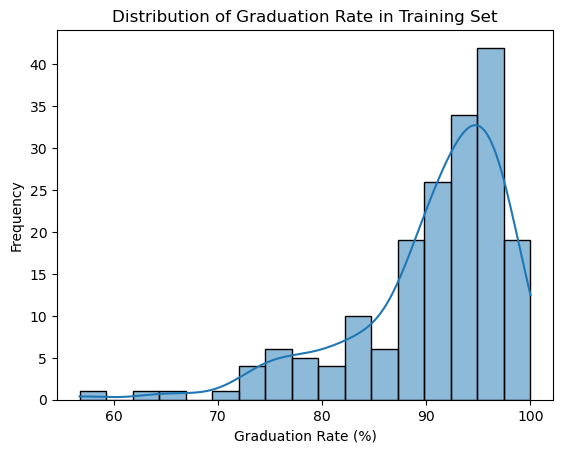

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


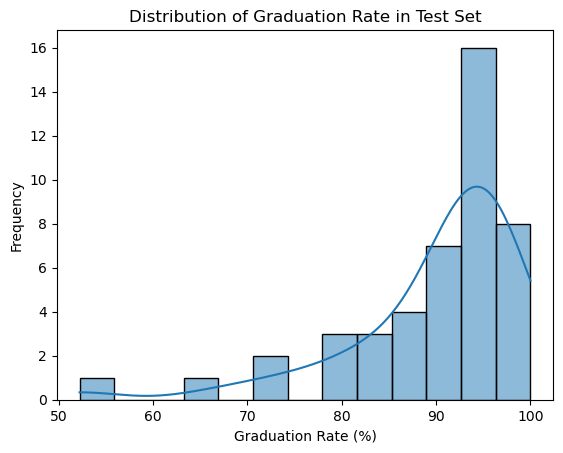

In [232]:
#check the datas if normally distributed
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the distribution of the target variable
sns.histplot(y_train, kde=True)
plt.title("Distribution of Graduation Rate in Training Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()
# Plot the distribution of the target variable in the test set
sns.histplot(y_test, kde=True)
plt.title("Distribution of Graduation Rate in Test Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()

# E.T.
#### Importing the StandardScaler for feature scaling


In [233]:
# scale from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
# Print the first few rows of the scaled training data


In [234]:
X_train_scaled.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,Overall_Classification_Not requiring assistance or intervention,Overall_Classification_Requiring assistance or intervention,Reason_for_Classification_In need of broad/comprehensive support,Reason_for_Classification_In need of focused/targeted support,Reason_for_Classification_Limited or no progress toward targets,Reason_for_Classification_Meeting or exceeding targets,Reason_for_Classification_Moderate progress toward targets,Reason_for_Classification_Substantial progress toward targets
District Name,,,,,,,,,,,,,,,,,,,,,
Milton,-1.022307,-0.524900,-1.019598,-0.518691,1.447149,-0.758676,-0.331798,-0.589044,-0.481750,-0.890172,0.840748,0.463057,0.704898,0.230089,-0.230089,-0.130558,-0.186231,-0.074953,2.541325,-0.849208,-0.801375
Frontier,-0.601450,-0.751166,-0.372618,0.127908,-1.324618,0.293949,-0.198033,0.279090,2.733725,-0.550571,-0.644389,0.391106,-0.490970,0.230089,-0.230089,-0.130558,-0.186231,-0.074953,-0.393496,1.177568,-0.801375
Granby,0.024147,-0.196814,0.154919,0.539379,0.422800,-0.553956,-0.733094,-0.589044,-0.481750,-0.278890,-0.078623,0.779639,-0.439692,0.230089,-0.230089,-0.130558,-0.186231,-0.074953,-0.393496,-0.849208,1.247855
Leicester,0.154954,-0.264693,0.189757,0.392425,-1.143850,-0.971593,-0.666212,-0.589044,-0.481750,0.694633,0.982189,0.405496,-0.516339,0.230089,-0.230089,-0.130558,-0.186231,-0.074953,-0.393496,1.177568,-0.801375
Medway,-1.079179,-0.400453,-0.979784,-1.106507,-1.023339,-0.522366,-0.097709,-0.589044,-0.481750,-1.048652,1.194352,0.088913,0.112532,0.230089,-0.230089,-0.130558,-0.186231,-0.074953,-0.393496,1.177568,-0.801375


In [235]:
X_test_scaled.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,Overall_Classification_Not requiring assistance or intervention,Overall_Classification_Requiring assistance or intervention,Reason_for_Classification_In need of broad/comprehensive support,Reason_for_Classification_In need of focused/targeted support,Reason_for_Classification_Limited or no progress toward targets,Reason_for_Classification_Meeting or exceeding targets,Reason_for_Classification_Moderate progress toward targets,Reason_for_Classification_Substantial progress toward targets
District Name,,,,,,,,,,,,,,,,,,,,,
Athol-Royalston,1.372025,-0.558839,1.518554,1.568058,-1.866920,-0.683865,1.875331,0.358012,-0.481750,0.038071,0.982189,-1.997655,-0.767786,0.230089,-0.230089,-0.130558,-0.186231,13.341664,-0.393496,-0.849208,-0.801375
Hingham,-1.431789,-0.762479,-1.328158,-0.871381,2.049707,-0.148579,-0.365239,-0.589044,0.395198,-0.980732,0.133540,0.678908,2.075573,0.230089,-0.230089,-0.130558,-0.186231,-0.074953,2.541325,-0.849208,-0.801375
Medfield,-1.505723,-0.694599,-1.288344,-1.664933,2.170219,-0.354842,-1.134391,-0.194437,-0.481750,-0.935452,0.133540,1.168173,1.299670,0.230089,-0.230089,-0.130558,-0.186231,-0.074953,2.541325,-0.849208,-0.801375
North Brookfield,0.939794,-0.264693,0.836737,1.509277,-2.348966,-0.104501,1.875331,3.199179,13.549414,2.188877,-0.785830,-1.407660,-0.597224,0.230089,-0.230089,-0.130558,-0.186231,13.341664,-0.393496,-0.849208,-0.801375
Winthrop,0.194764,0.244405,0.214641,-0.988944,0.121521,-0.950761,-0.799977,-0.589044,-0.481750,0.287111,0.699306,-1.479610,-0.413633,0.230089,-0.230089,-0.130558,-0.186231,-0.074953,-0.393496,-0.849208,1.247855
